Imports Ej 4 practico 2

In [1]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Ejercicio 4 practica 2, auto-mpg dataset

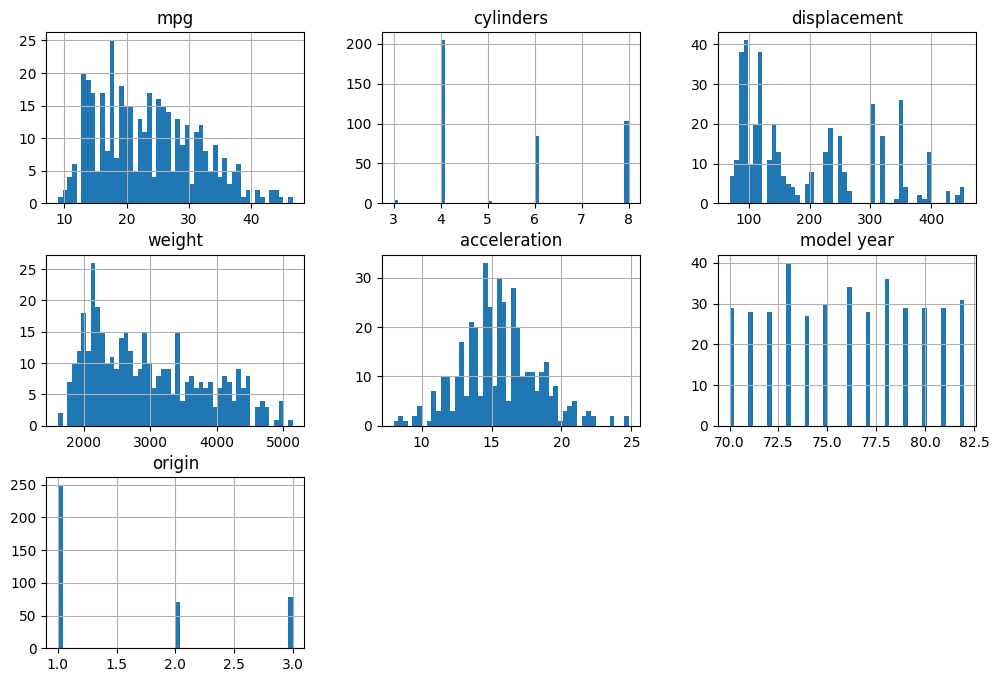

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Nul

/tmp/ipykernel_304161/1764316167.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carsConsume["horsepower"].replace("?", np.nan, inplace=True)


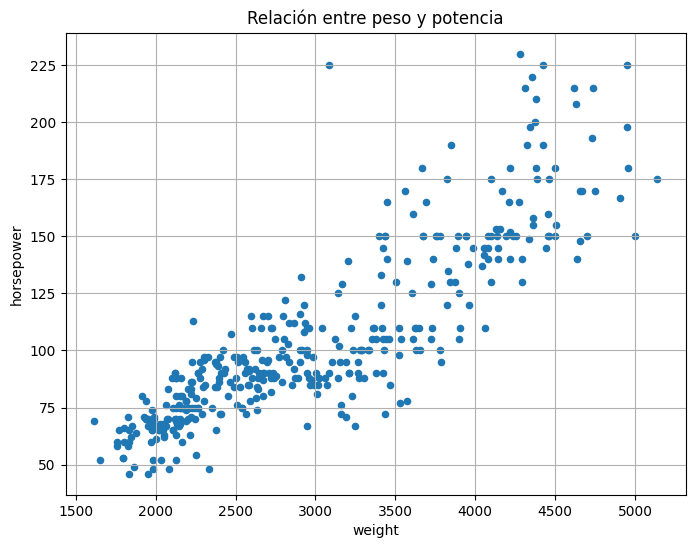

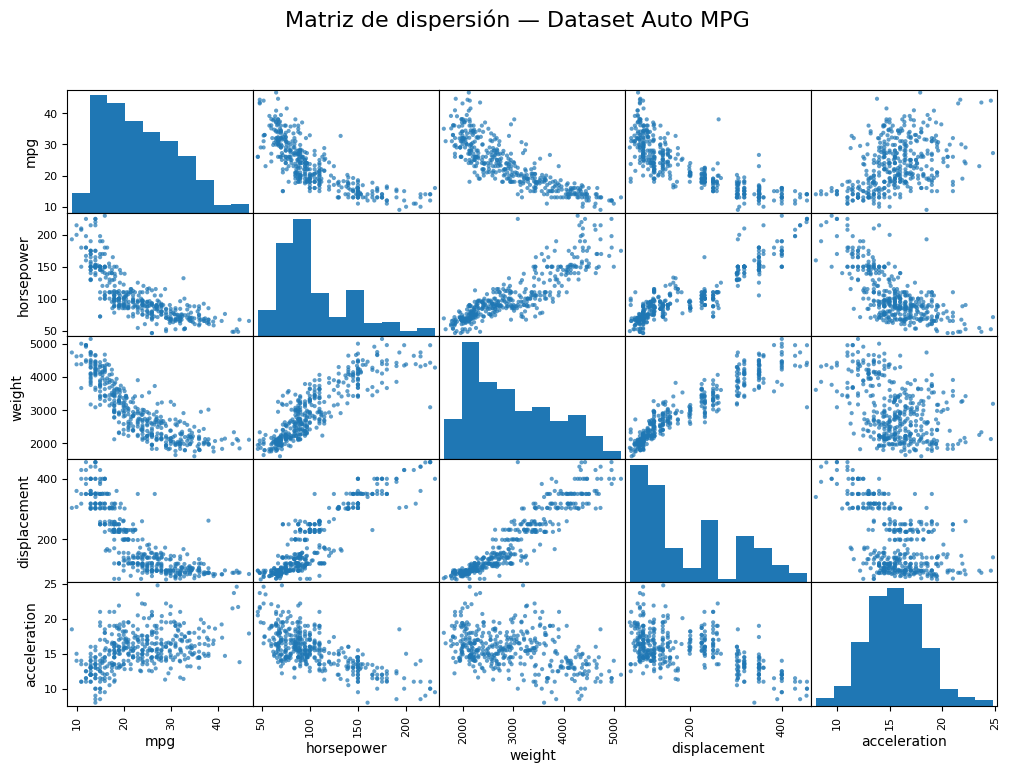

mpg                        1.000000
acceleration_per_hp        0.710556
model year                 0.579267
origin                     0.563450
acceleration               0.420289
power_weight_ratio        -0.269699
displacement_per_weight   -0.714536
cylinders                 -0.775396
horsepower                -0.778427
displacement              -0.804203
weight                    -0.831741
Name: mpg, dtype: float64
Shape del dataset procesado: (398, 9)
R²: 0.833
RMSE: 3.39
Primeras 5 predicciones: [19.8 21.3 34.  25.6 16.3]
Valores reales: [15.  18.  40.9 24.  17. ]
Linear Regression RMSE: 3.393445064514215


/tmp/ipykernel_304161/1764316167.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carsConsume["horsepower"].fillna(median_hp, inplace=True)


In [3]:
carsConsume = pd.read_csv(Path("Datasets/auto-mpg[1].csv"))
carsConsume.hist(bins=50, figsize=(12,8))
plt.show()
print(carsConsume.head())
print(carsConsume.columns)

# Reemplazar "?" por NaN y convertir horsepower a numérico
carsConsume["horsepower"].replace("?", np.nan, inplace=True)
carsConsume["horsepower"] = carsConsume["horsepower"].astype(float)

print(carsConsume.info())

y = carsConsume["mpg"]
X = carsConsume.drop(columns=["mpg", "car name"], errors='ignore')

train_carsConsume, test_carsConsume = train_test_split(carsConsume,test_size=0.2, stratify=carsConsume["cylinders"], random_state=42)

X_train = train_carsConsume.drop(columns=["mpg", "car name"], errors='ignore')
y_train = train_carsConsume["mpg"]

X_test = test_carsConsume.drop(columns=["mpg", "car name"], errors='ignore')
y_test = test_carsConsume["mpg"]

carsConsume.plot(kind="scatter", x="weight", y="horsepower", grid=True, figsize=(8, 6))
plt.title("Relación entre peso y potencia")
plt.show()

attributes = ["mpg", "horsepower", "weight", "displacement", "acceleration"]
scatter_matrix(carsConsume[attributes], figsize=(12, 8), alpha=0.7, diagonal='hist')
plt.suptitle("Matriz de dispersión — Dataset Auto MPG", fontsize=16)
plt.show()

# Relación potencia/peso — eficiencia del motor
carsConsume["power_weight_ratio"] = carsConsume["horsepower"] / carsConsume["weight"]

# Relación cilindrada/peso — mide "grandeza del motor relativo al tamaño del auto"
carsConsume["displacement_per_weight"] = carsConsume["displacement"] / carsConsume["weight"]

# Relación aceleración/potencia — qué tan rápido acelera por caballo de fuerza
carsConsume["acceleration_per_hp"] = carsConsume["acceleration"] / carsConsume["horsepower"]

corr_matrix = carsConsume.corr(numeric_only=True)

# Ordenar correlaciones con respecto a 'mpg'
print(corr_matrix["mpg"].sort_values(ascending=False))

median_hp = carsConsume["horsepower"].median()
carsConsume["horsepower"].fillna(median_hp, inplace=True)

num_attribs = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]
cat_attribs = ["origin"]

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", cat_pipeline, cat_attribs)])

set_config(display='diagram')  # Muestra el pipeline visualmente
carsConsume_prepared = preprocessing.fit_transform(carsConsume)

print("Shape del dataset procesado:", carsConsume_prepared.shape)

X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)
y_pred = lin_reg.predict(X_test_prepared)

print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

carsConsume_predictions = lin_reg.predict(X_test_prepared)
print("Primeras 5 predicciones:", carsConsume_predictions[:5].round(1))
print("Valores reales:", y_test.iloc[:5].values)

lin_mse = mean_squared_error(y_test, carsConsume_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE:", lin_rmse)